In [199]:
import argparse
from ray.tune import Analysis
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [200]:
#logdir = '.'
#print(os.getcwd())

logdir = '/home/jovyan/have-deepsky/scripts/output/expr_20210908_130924/PPO_DockingEnv_85b41_00000_0_2021-09-08_13-09-26/'

In [201]:

def get_succ_rate(expr_path):
    """
    The percent of cases that the control system successfully performs a mission.

    From: Safe Autononmy Metrics by Dr. Kerianne Hobbs
    """
    data = pd.read_csv(expr_path + '/progress.csv')
    if len(data.columns) > 70: # some do not have custom metrics available
        success_mean_index = [i for i, j in enumerate(data.columns)
                           if "success_mean" in j][0]
        return data.iloc[-1, success_mean_index]*100
    else:
        return float('nan')

In [202]:

def get_success_mean_col(data):
    return data['custom_metrics/outcome/success_mean']

def get_eps_len_mean(data):
    return data['episode_len_mean']


In [203]:

def get_ep_length(expr_path):
    """
    The average time in seconds (or timesteps) required to successfully complete the
    task (an episode).

    From: Safe Autonomy Metrics by Dr. Kerianne Hobbs
    """
    data = pd.read_csv(expr_path + '/progress.csv')
    return data['episode_len_mean']


In [204]:
data

,episode_reward_max,episode_reward_min,episode_reward_mean,episode_len_mean,episodes_this_iter,num_healthy_workers,timesteps_total,done,episodes_total,training_iteration,...,perf/ram_util_percent,info/learner/default_policy/cur_kl_coeff,info/learner/default_policy/cur_lr,info/learner/default_policy/total_loss,info/learner/default_policy/policy_loss,info/learner/default_policy/vf_loss,info/learner/default_policy/vf_explained_var,info/learner/default_policy/kl,info/learner/default_policy/entropy,info/learner/default_policy/entropy_coeff
0,-4.734360,-7.158733,-6.029772,469.500000,6,6,4800,False,6,1,...,7.90,0.2,0.00005,0.063973,-0.016166,0.077747,0.106637,0.011959,3.207067,0.0
1,-4.734360,-11.226403,-8.558898,735.250000,6,6,9600,False,12,2,...,8.00,0.2,0.00005,0.003641,-0.012332,0.013103,0.163166,0.014350,3.195514,0.0
2,-4.734360,-11.269493,-8.593340,737.687500,4,6,14400,False,16,3,...,8.00,0.2,0.00005,-0.012456,-0.017996,0.002546,0.402702,0.014972,3.173154,0.0
3,-4.731994,-11.269493,-8.884500,770.619048,5,6,19200,False,21,4,...,8.00,0.2,0.00005,-0.014543,-0.018694,0.000802,0.562935,0.016749,3.146881,0.0
4,-4.731994,-11.269493,-8.928477,781.148148,6,6,24000,False,27,5,...,8.00,0.2,0.00005,-0.009681,-0.014419,0.001526,0.260680,0.016061,3.126563,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2.874872,-1.260117,2.150620,110.960000,40,6,940800,False,7719,196,...,6.75,0.3,0.00005,-0.011982,-0.031587,0.016135,0.972784,0.011568,1.682162,0.0
196,2.874872,-1.260117,2.078394,114.230000,43,6,945600,False,7762,197,...,6.70,0.3,0.00005,-0.005635,-0.030833,0.021802,0.961479,0.011322,1.664525,0.0
197,2.856343,-1.614209,2.083948,113.820000,43,6,950400,False,7805,198,...,6.70,0.3,0.00005,-0.008765,-0.031613,0.019334,0.970413,0.011714,1.678850,0.0
198,2.856343,-1.614209,2.151531,111.030000,42,6,955200,False,7847,199,...,6.70,0.3,0.00005,-0.005484,-0.029086,0.020108,0.965222,0.011645,1.634046,0.0


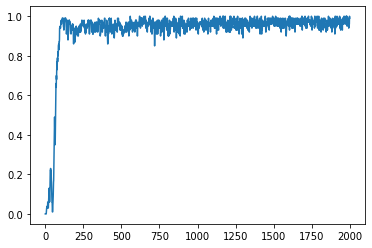

In [205]:

    #args = get_args()
    #success_rate = get_succ_rate(args.logdir)

    data = pd.read_csv(logdir + '/progress.csv')

    success_mean_data = get_success_mean_col(data)
    plt.figure()
    plt.plot(success_mean_data)

In [206]:
data.columns

Index(['episode_reward_max', 'episode_reward_min', 'episode_reward_mean',
       'episode_len_mean', 'episodes_this_iter', 'num_healthy_workers',
       'timesteps_total', 'done', 'episodes_total', 'training_iteration',
       'experiment_id', 'date', 'timestamp', 'time_this_iter_s',
       'time_total_s', 'pid', 'hostname', 'node_ip', 'time_since_restore',
       'timesteps_since_restore', 'iterations_since_restore', 'trial_id',
       'custom_metrics/outcome/success_mean',
       'custom_metrics/outcome/success_min',
       'custom_metrics/outcome/success_max',
       'custom_metrics/outcome/failure_mean',
       'custom_metrics/outcome/failure_min',
       'custom_metrics/outcome/failure_max',
       'custom_metrics/failure_code_ratio/timeout_mean',
       'custom_metrics/failure_code_ratio/timeout_min',
       'custom_metrics/failure_code_ratio/timeout_max',
       'custom_metrics/failure_code_ratio/distance_mean',
       'custom_metrics/failure_code_ratio/distance_min',
       'cu

In [207]:
data['custom_metrics/outcome/success_mean']

0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
        ... 
1995    0.96
1996    0.96
1997    0.96
1998    1.00
1999    0.99
Name: custom_metrics/outcome/success_mean, Length: 2000, dtype: float64

In [208]:
data.shape

(2000, 84)

In [209]:
data.iloc[0]['custom_metrics/outcome/success_mean']

0.0

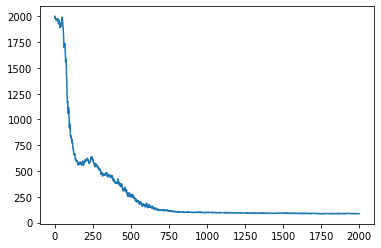

In [210]:
data = pd.read_csv(logdir + '/progress.csv')
eps_len_data = get_eps_len_mean(data)
plt.figure()
plt.plot(eps_len_data)

In [211]:
data

,episode_reward_max,episode_reward_min,episode_reward_mean,episode_len_mean,episodes_this_iter,num_healthy_workers,timesteps_total,done,episodes_total,training_iteration,...,perf/ram_util_percent,info/learner/default_policy/cur_kl_coeff,info/learner/default_policy/cur_lr,info/learner/default_policy/total_loss,info/learner/default_policy/policy_loss,info/learner/default_policy/vf_loss,info/learner/default_policy/vf_explained_var,info/learner/default_policy/kl,info/learner/default_policy/entropy,info/learner/default_policy/entropy_coeff
0,-18.655563,-112.144283,-54.811400,2001.000000,20,20,40020,False,20,1,...,3.3,0.20000,0.00005,0.448223,-0.011958,0.457934,0.866522,0.011235,4.784349,0.0
1,-16.246107,-112.144283,-41.091246,2001.000000,20,20,80040,False,40,2,...,3.3,0.20000,0.00005,0.354184,-0.011222,0.362872,0.658825,0.012672,4.774849,0.0
2,-4.756358,-112.144283,-33.605733,1981.216667,20,20,118873,False,60,3,...,3.3,0.20000,0.00005,0.442427,-0.008721,0.448855,0.236959,0.011465,4.770402,0.0
3,-4.756358,-112.144283,-29.522092,1986.162500,20,20,158893,False,80,4,...,3.3,0.20000,0.00005,0.416564,-0.006365,0.421028,0.197994,0.009504,4.762217,0.0
4,-4.756358,-112.144283,-26.698486,1980.370000,20,20,198037,False,100,5,...,3.3,0.20000,0.00005,0.436671,-0.007244,0.441840,0.146309,0.010373,4.755604,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,5.495959,-0.715093,5.067938,87.020000,59,20,15459375,False,89511,1996,...,4.1,0.50625,0.00005,0.320059,-0.039751,0.353649,0.675947,0.012169,1.722290,0.0
1996,5.495959,-0.879340,5.053289,87.450000,60,20,15464614,False,89571,1997,...,4.1,0.50625,0.00005,0.237327,-0.030333,0.262009,0.795310,0.011163,1.841424,0.0
1997,5.516521,-0.879340,5.047054,87.050000,60,20,15469803,False,89631,1998,...,4.1,0.50625,0.00005,0.145591,-0.027024,0.167639,0.800470,0.009829,1.774796,0.0
1998,5.516521,5.107319,5.295187,86.190000,60,20,15475010,False,89691,1999,...,4.1,0.50625,0.00005,-0.017107,-0.034105,0.011288,0.978471,0.011280,1.732549,0.0


In [212]:
data['timesteps_total']

0          40020
1          80040
2         118873
3         158893
4         198037
          ...   
1995    15459375
1996    15464614
1997    15469803
1998    15475010
1999    15480275
Name: timesteps_total, Length: 2000, dtype: int64

In [213]:
steps = data['timesteps_total']
success_mean= data['custom_metrics/outcome/success_mean']


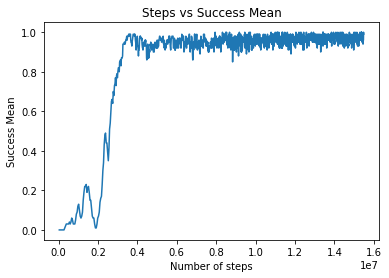

In [214]:
plt.figure()
plt.title('Steps vs Success Mean')
plt.ylabel('Success Mean')
plt.xlabel('Number of steps')
plt.plot(steps,success_mean)

In [215]:
steps = data['timesteps_total']
episodes_len_mean= data['episode_len_mean']

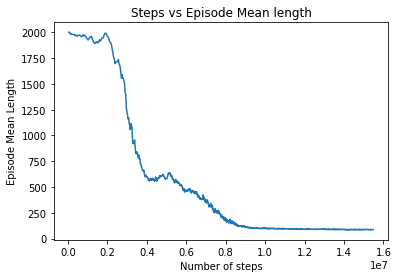

In [216]:
plt.figure()
plt.title('Steps vs Episode Mean length')
plt.ylabel('Episode Mean Length')
plt.xlabel('Number of steps')
plt.plot(steps,episodes_len_mean)

In [217]:
logdir = '/data/petabyte/safe_autonomy/ieee_aero_2022/experiments/rejoin_2d/expr_20210909_194211/'

In [218]:
all_subdirs = next(os.walk(logdir))[1]
print(all_subdirs)

['PPO_DubinsRejoin_0920c_00004_4_seed=1862_2021-09-09_19-42-15', 'PPO_DubinsRejoin_0920c_00005_5_seed=66342_2021-09-09_19-42-15', 'PPO_DubinsRejoin_0920c_00002_2_seed=70972_2021-09-09_19-42-15', 'PPO_DubinsRejoin_0920c_00009_9_seed=14743_2021-09-09_19-42-15', 'PPO_DubinsRejoin_0920c_00000_0_seed=40578_2021-09-09_19-42-15', 'training_logs', 'PPO_DubinsRejoin_0920c_00001_1_seed=41411_2021-09-09_19-42-15', 'PPO_DubinsRejoin_0920c_00003_3_seed=39321_2021-09-09_19-42-15', 'PPO_DubinsRejoin_0920c_00008_8_seed=69688_2021-09-09_19-42-15', 'PPO_DubinsRejoin_0920c_00006_6_seed=29558_2021-09-09_19-42-15', 'PPO_DubinsRejoin_0920c_00007_7_seed=33790_2021-09-09_19-42-15']


In [219]:
for d in all_subdirs: 
    print(d)

PPO_DubinsRejoin_0920c_00004_4_seed=1862_2021-09-09_19-42-15
PPO_DubinsRejoin_0920c_00005_5_seed=66342_2021-09-09_19-42-15
PPO_DubinsRejoin_0920c_00002_2_seed=70972_2021-09-09_19-42-15
PPO_DubinsRejoin_0920c_00009_9_seed=14743_2021-09-09_19-42-15
PPO_DubinsRejoin_0920c_00000_0_seed=40578_2021-09-09_19-42-15
training_logs
PPO_DubinsRejoin_0920c_00001_1_seed=41411_2021-09-09_19-42-15
PPO_DubinsRejoin_0920c_00003_3_seed=39321_2021-09-09_19-42-15
PPO_DubinsRejoin_0920c_00008_8_seed=69688_2021-09-09_19-42-15
PPO_DubinsRejoin_0920c_00006_6_seed=29558_2021-09-09_19-42-15
PPO_DubinsRejoin_0920c_00007_7_seed=33790_2021-09-09_19-42-15


1
2
3
4
5
6
7
8
9
10


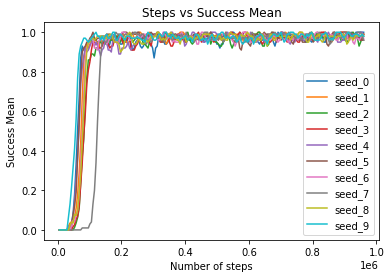

In [220]:
plt.figure()
plt.title('Steps vs Success Mean')
plt.ylabel('Success Mean')
plt.xlabel('Number of steps')

seed = 0
for d in all_subdirs: 
    if d == 'training_logs':
        continue
    else: 
        seed_name = 'seed_' + str(seed)
        csv_path = logdir + '/' + d + '/' + 'progress.csv'
        data = pd.read_csv(csv_path)
        steps = data['timesteps_total']
        success_mean= data['custom_metrics/outcome/success_mean']
        plt.plot(steps,success_mean,label=seed_name)
        seed = seed + 1
        print(seed)

plt.legend()
        

In [221]:
d

'PPO_DubinsRejoin_0920c_00007_7_seed=33790_2021-09-09_19-42-15'

In [222]:
env_name = d.split('_')[1]
env_name

'DubinsRejoin'

In [223]:
logdir.split('/')[-2]

'expr_20210909_194211'

In [224]:
logdir = '/data/petabyte/safe_autonomy/ieee_aero_2022/experiments/rejoin_2d/expr_20210909_194211/'

In [225]:
all_subdirs = next(os.walk(logdir))[1]
print(all_subdirs)

['PPO_DubinsRejoin_0920c_00004_4_seed=1862_2021-09-09_19-42-15', 'PPO_DubinsRejoin_0920c_00005_5_seed=66342_2021-09-09_19-42-15', 'PPO_DubinsRejoin_0920c_00002_2_seed=70972_2021-09-09_19-42-15', 'PPO_DubinsRejoin_0920c_00009_9_seed=14743_2021-09-09_19-42-15', 'PPO_DubinsRejoin_0920c_00000_0_seed=40578_2021-09-09_19-42-15', 'training_logs', 'PPO_DubinsRejoin_0920c_00001_1_seed=41411_2021-09-09_19-42-15', 'PPO_DubinsRejoin_0920c_00003_3_seed=39321_2021-09-09_19-42-15', 'PPO_DubinsRejoin_0920c_00008_8_seed=69688_2021-09-09_19-42-15', 'PPO_DubinsRejoin_0920c_00006_6_seed=29558_2021-09-09_19-42-15', 'PPO_DubinsRejoin_0920c_00007_7_seed=33790_2021-09-09_19-42-15']


In [226]:
all_subdirs

['PPO_DubinsRejoin_0920c_00004_4_seed=1862_2021-09-09_19-42-15',
 'PPO_DubinsRejoin_0920c_00005_5_seed=66342_2021-09-09_19-42-15',
 'PPO_DubinsRejoin_0920c_00002_2_seed=70972_2021-09-09_19-42-15',
 'PPO_DubinsRejoin_0920c_00009_9_seed=14743_2021-09-09_19-42-15',
 'PPO_DubinsRejoin_0920c_00000_0_seed=40578_2021-09-09_19-42-15',
 'training_logs',
 'PPO_DubinsRejoin_0920c_00001_1_seed=41411_2021-09-09_19-42-15',
 'PPO_DubinsRejoin_0920c_00003_3_seed=39321_2021-09-09_19-42-15',
 'PPO_DubinsRejoin_0920c_00008_8_seed=69688_2021-09-09_19-42-15',
 'PPO_DubinsRejoin_0920c_00006_6_seed=29558_2021-09-09_19-42-15',
 'PPO_DubinsRejoin_0920c_00007_7_seed=33790_2021-09-09_19-42-15']

In [227]:
# preprocessing logic 

# keep track of all csv files
csv_file_tracker = []
for d in all_subdirs: 
    if d == 'training_logs':
        continue
    else: 
        seed_name = 'seed_' + str(seed)
        csv_path = logdir + '/' + d + '/' + 'progress.csv'
        csv_file_tracker.append(csv_path)
        

In [228]:
csv_file_tracker

['/data/petabyte/safe_autonomy/ieee_aero_2022/experiments/rejoin_2d/expr_20210909_194211//PPO_DubinsRejoin_0920c_00004_4_seed=1862_2021-09-09_19-42-15/progress.csv',
 '/data/petabyte/safe_autonomy/ieee_aero_2022/experiments/rejoin_2d/expr_20210909_194211//PPO_DubinsRejoin_0920c_00005_5_seed=66342_2021-09-09_19-42-15/progress.csv',
 '/data/petabyte/safe_autonomy/ieee_aero_2022/experiments/rejoin_2d/expr_20210909_194211//PPO_DubinsRejoin_0920c_00002_2_seed=70972_2021-09-09_19-42-15/progress.csv',
 '/data/petabyte/safe_autonomy/ieee_aero_2022/experiments/rejoin_2d/expr_20210909_194211//PPO_DubinsRejoin_0920c_00009_9_seed=14743_2021-09-09_19-42-15/progress.csv',
 '/data/petabyte/safe_autonomy/ieee_aero_2022/experiments/rejoin_2d/expr_20210909_194211//PPO_DubinsRejoin_0920c_00000_0_seed=40578_2021-09-09_19-42-15/progress.csv',
 '/data/petabyte/safe_autonomy/ieee_aero_2022/experiments/rejoin_2d/expr_20210909_194211//PPO_DubinsRejoin_0920c_00001_1_seed=41411_2021-09-09_19-42-15/progress.csv',

In [185]:
data0 = pd.read_csv(csv_file_tracker[0])

In [186]:
data0

,episode_reward_max,episode_reward_min,episode_reward_mean,episode_len_mean,episodes_this_iter,num_healthy_workers,timesteps_total,done,episodes_total,training_iteration,...,perf/ram_util_percent,info/learner/default_policy/cur_kl_coeff,info/learner/default_policy/cur_lr,info/learner/default_policy/total_loss,info/learner/default_policy/policy_loss,info/learner/default_policy/vf_loss,info/learner/default_policy/vf_explained_var,info/learner/default_policy/kl,info/learner/default_policy/entropy,info/learner/default_policy/entropy_coeff
0,-5.612750,-7.609310,-6.336753,498.500000,4,6,4800,False,4,1,...,7.9,0.2,0.00005,0.050991,-0.013490,0.061610,0.096543,0.014355,3.205072,0.0
1,-4.238926,-11.350897,-6.870156,552.428571,10,6,9600,False,14,2,...,8.0,0.2,0.00005,0.001858,-0.018365,0.016194,0.059092,0.020150,3.193400,0.0
2,-4.238926,-11.350897,-7.086424,574.857143,7,6,14400,False,21,3,...,8.0,0.3,0.00005,-0.010336,-0.015273,0.001043,0.482162,0.012979,3.166509,0.0
3,-4.238926,-11.350897,-7.635164,632.115385,5,6,19200,False,26,4,...,8.0,0.3,0.00005,-0.024294,-0.030250,0.000398,0.660538,0.018525,3.119249,0.0
4,-4.238926,-11.350897,-8.086624,681.300000,4,6,24000,False,30,5,...,8.0,0.3,0.00005,-0.022795,-0.028597,0.000153,0.399877,0.018829,3.099231,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2.898855,0.868836,2.216001,108.360000,46,6,940800,False,7458,196,...,8.0,0.3,0.00005,-0.005238,-0.028190,0.019635,0.965110,0.011055,1.653859,0.0
196,2.827167,0.868836,2.170551,113.150000,37,6,945600,False,7495,197,...,8.0,0.3,0.00005,-0.015029,-0.029098,0.011012,0.981737,0.010190,1.643331,0.0
197,2.844852,0.625845,2.115012,119.310000,41,6,950400,False,7536,198,...,8.0,0.3,0.00005,-0.009998,-0.030144,0.016531,0.975683,0.012049,1.610524,0.0
198,2.844852,0.625845,2.149121,115.840000,43,6,955200,False,7579,199,...,8.0,0.3,0.00005,-0.006580,-0.029347,0.019702,0.963161,0.010218,1.603113,0.0


In [187]:
data1 = pd.read_csv(csv_file_tracker[1])

In [188]:
data1

,episode_reward_max,episode_reward_min,episode_reward_mean,episode_len_mean,episodes_this_iter,num_healthy_workers,timesteps_total,done,episodes_total,training_iteration,...,perf/ram_util_percent,info/learner/default_policy/cur_kl_coeff,info/learner/default_policy/cur_lr,info/learner/default_policy/total_loss,info/learner/default_policy/policy_loss,info/learner/default_policy/vf_loss,info/learner/default_policy/vf_explained_var,info/learner/default_policy/kl,info/learner/default_policy/entropy,info/learner/default_policy/entropy_coeff
0,-5.103938,-7.020731,-5.753329,441.500000,4,6,4800,False,4,1,...,7.914286,0.2,0.00005,0.053653,-0.014899,0.065870,0.117395,0.013407,3.205418,0.0
1,-1.467141,-11.227681,-7.696404,647.000000,6,6,9600,False,10,2,...,8.000000,0.2,0.00005,-0.003752,-0.019110,0.012258,0.086897,0.015500,3.188772,0.0
2,-1.467141,-11.227681,-8.804807,765.000000,5,6,14400,False,15,3,...,8.000000,0.2,0.00005,-0.011585,-0.017169,0.002338,0.222708,0.016229,3.155499,0.0
3,-1.467141,-11.227681,-9.298776,818.095238,6,6,19200,False,21,4,...,8.000000,0.2,0.00005,-0.018328,-0.022266,0.000735,0.256570,0.016014,3.133640,0.0
4,-1.467141,-11.227681,-8.481960,741.655172,8,6,24000,False,29,5,...,8.000000,0.2,0.00005,-0.007990,-0.011369,0.000934,0.334349,0.012229,3.111987,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2.838653,-1.254496,2.160684,109.980000,43,6,940800,False,7664,196,...,5.500000,0.2,0.00005,-0.006704,-0.025125,0.016188,0.972083,0.011164,1.429507,0.0
196,2.838653,-1.410768,2.105395,111.360000,42,6,945600,False,7706,197,...,5.142857,0.2,0.00005,-0.010009,-0.024581,0.012881,0.980969,0.008456,1.534225,0.0
197,2.757299,-1.747241,2.020647,111.530000,46,6,950400,False,7752,198,...,5.100000,0.2,0.00005,0.016296,-0.023759,0.038333,0.936220,0.008614,1.458827,0.0
198,2.895172,-1.747241,2.127355,109.170000,42,6,955200,False,7794,199,...,5.100000,0.2,0.00005,-0.006864,-0.025547,0.016152,0.972005,0.012654,1.451889,0.0


In [189]:
data2 = pd.read_csv(csv_file_tracker[1])

In [190]:
data2

,episode_reward_max,episode_reward_min,episode_reward_mean,episode_len_mean,episodes_this_iter,num_healthy_workers,timesteps_total,done,episodes_total,training_iteration,...,perf/ram_util_percent,info/learner/default_policy/cur_kl_coeff,info/learner/default_policy/cur_lr,info/learner/default_policy/total_loss,info/learner/default_policy/policy_loss,info/learner/default_policy/vf_loss,info/learner/default_policy/vf_explained_var,info/learner/default_policy/kl,info/learner/default_policy/entropy,info/learner/default_policy/entropy_coeff
0,-5.103938,-7.020731,-5.753329,441.500000,4,6,4800,False,4,1,...,7.914286,0.2,0.00005,0.053653,-0.014899,0.065870,0.117395,0.013407,3.205418,0.0
1,-1.467141,-11.227681,-7.696404,647.000000,6,6,9600,False,10,2,...,8.000000,0.2,0.00005,-0.003752,-0.019110,0.012258,0.086897,0.015500,3.188772,0.0
2,-1.467141,-11.227681,-8.804807,765.000000,5,6,14400,False,15,3,...,8.000000,0.2,0.00005,-0.011585,-0.017169,0.002338,0.222708,0.016229,3.155499,0.0
3,-1.467141,-11.227681,-9.298776,818.095238,6,6,19200,False,21,4,...,8.000000,0.2,0.00005,-0.018328,-0.022266,0.000735,0.256570,0.016014,3.133640,0.0
4,-1.467141,-11.227681,-8.481960,741.655172,8,6,24000,False,29,5,...,8.000000,0.2,0.00005,-0.007990,-0.011369,0.000934,0.334349,0.012229,3.111987,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2.838653,-1.254496,2.160684,109.980000,43,6,940800,False,7664,196,...,5.500000,0.2,0.00005,-0.006704,-0.025125,0.016188,0.972083,0.011164,1.429507,0.0
196,2.838653,-1.410768,2.105395,111.360000,42,6,945600,False,7706,197,...,5.142857,0.2,0.00005,-0.010009,-0.024581,0.012881,0.980969,0.008456,1.534225,0.0
197,2.757299,-1.747241,2.020647,111.530000,46,6,950400,False,7752,198,...,5.100000,0.2,0.00005,0.016296,-0.023759,0.038333,0.936220,0.008614,1.458827,0.0
198,2.895172,-1.747241,2.127355,109.170000,42,6,955200,False,7794,199,...,5.100000,0.2,0.00005,-0.006864,-0.025547,0.016152,0.972005,0.012654,1.451889,0.0


In [191]:
data0.iloc[152]['timesteps_total']

734400

In [192]:
data2.iloc[152]['timesteps_total']

734400

In [193]:
iters = 0
all_data = pd.DataFrame()
for path in csv_file_tracker: 
    current_data = pd.read_csv(path)
    if iters == 0:
        all_data['timesteps_total'] = current_data['timesteps_total']
        all_data['episode_len_mean' + '_' + str(iters)] = current_data['episode_len_mean']
    else: 
        all_data['episode_len_mean' + '_' + str(iters)] = current_data['episode_len_mean']
    iters += 1   

In [194]:
all_data

,timesteps_total,episode_len_mean_0,episode_len_mean_1,episode_len_mean_2,episode_len_mean_3,episode_len_mean_4,episode_len_mean_5,episode_len_mean_6,episode_len_mean_7,episode_len_mean_8,episode_len_mean_9
0,4800,498.500000,441.500000,564.400000,549.666667,448.200000,509.250000,497.200000,624.333333,401.750000,469.500000
1,9600,552.428571,647.000000,551.714286,674.454545,582.923077,609.800000,683.545455,750.888889,650.545455,735.250000
2,14400,574.857143,765.000000,569.611111,721.529412,606.900000,724.400000,751.571429,746.437500,744.000000,737.687500
3,19200,632.115385,818.095238,664.320000,765.545455,621.960000,773.000000,800.750000,755.954545,808.250000,770.619048
4,24000,681.300000,741.655172,720.433333,809.148148,687.161290,802.538462,846.961538,762.689655,846.800000,781.148148
...,...,...,...,...,...,...,...,...,...,...,...
195,940800,108.360000,109.980000,106.980000,104.010000,121.810000,106.170000,111.870000,110.980000,113.780000,110.960000
196,945600,113.150000,111.360000,111.380000,109.590000,120.800000,113.090000,109.770000,113.600000,111.960000,114.230000
197,950400,119.310000,111.530000,109.630000,102.960000,113.410000,111.410000,106.700000,119.280000,111.000000,113.820000
198,955200,115.840000,109.170000,107.310000,98.640000,112.150000,113.970000,110.260000,114.910000,109.870000,111.030000


In [ ]:
# compute smoothed average across ep_len_mean 0 to 9 
# so separately extract eps len 0 to eps len 9 out separately 
sns.tsplot(data=data, time='timesteps_total', value='episode_len_mean', unit="Unit", condition=condition, ci='sd', **kwargs)


In [196]:
another_log_dir = '/home/jovyan/rta-ablation-study/logs/ppo/docking2d/exp1/rand_seed_1630'
txtfile = another_log_dir + '/' + 'progress.txt'
table = pd.read_table(txtfile)

In [ ]:
table

In [ ]:
table.columns

In [ ]:
csv_file_tracker

In [ ]:
data0 = pd.read_csv(csv_file_tracker[0])

In [ ]:
data_dfs = [pd.read_csv(csv_file_tracker[i]) for i in range(len(csv_file_tracker))]

In [ ]:
# bring in data from csv files into new format 
proc_data_df = pd.DataFrame()
proc_data_df['timestep_total'] [0] = 0
proc_data_df['trial_number'] [0] = 0
proc_data_df['episode_len_mean'] [0] = 0



In [ ]:
timestep_total = []
episode_len_mean = []


In [ ]:
len(proc_data_df['timestep_total'])

In [ ]:

# this will give iloc position
for i in range(data_dfs[0].shape[0]):
    # iterate thru the dataset for the seed trails 
    for ds,pos in enumerate(data_dfs):
        if i == 0: 
            proc_data_df.iloc[i]['timestep_total'] = ds.iloc[i]['timestep_total']
            proc_data_df.iloc[i]['trial_number'] = pos
            proc_data_df.iloc[i]['episode_len_mean'] = ds.iloc[i]['episode_len_mean']
        else:
            proc_data_df['timestep_total'].append(ds.iloc[i]['timestep_total']
            proc_data_df.iloc[i]['trial_number'].append(pos)
            proc_data_df.iloc[i]['episode_len_mean'].append(ds.iloc[i]['episode_len_mean'])
            

In [ ]:
# a new approach 
proc_dict_df = {'timestep_total':[],'seed_num':[],'episode_len_mean':[]}
# create a dict containing arrays
for i in range(data_dfs[0].shape[0]):
    print(i)
    for pos,ds in enumerate(data_dfs):
        proc_dict_df['timestep_total'].append(ds['timestep_total'])
        proc_dict_df['trial_number'].append(pos)
        proc_dict_df['episode_len_mean'].append(ds['episode_len_mean'])
            

# dict key - name of array 

# recreate dataframe from dict 

In [ ]:
csv_file_tracker[0]

In [ ]:
data_dfs[0].iloc[[0]]['timestep_total']

In [ ]:
# group by timepoints 


for ds in data_dfs: 
    